In [11]:
from selenium import webdriver

In [12]:
driver = webdriver.Chrome(executable_path=r"C:\sele\chromedriver.exe")

C:\Users\Autumn\AppData\Local\Temp\ipykernel_10572\2630300822.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:\sele\chromedriver.exe")


In [13]:
url = "http://www.riss.kr/search/Search.do?isDetailSearch=Y&searchGubun=true&viewYn=OP&queryText=znPublisher%2C%EC%97%B0%EC%84%B8%EB%8C%80%ED%95%99%EA%B5%90+%EB%8C%80%ED%95%99%EC%9B%90&strQuery=&exQuery=l_sub_code%3A20%E2%97%88&exQueryText=%EC%A3%BC%EC%A0%9C%EB%B6%84%EB%A5%98+%5B%EC%82%AC%ED%9A%8C%EA%B3%BC%ED%95%99%5D%40%40l_sub_code%3A20%E2%97%88&order=%2FDESC&onHanja=false&strSort=RANK&p_year1=&p_year2=&iStartCount=0&orderBy=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&ccl_code=&inside_outside=&fric_yn=&image_yn=&gubun=&kdc=&ttsUseYn=&l_sub_code=&fsearchMethod=search&sflag=1&isFDetailSearch=N&pageNumber=1&resultKeyword=&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&icate=bib_t&colName=bib_t&pageScale=10&isTab=Y&regnm=&dorg_storage=&language=&language_code=&clickKeyword=&relationKeyword=&query="

In [14]:
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

In [15]:
import time

In [30]:
driver.get(url)

In [16]:
keyword = {
    "1970":[],
    "1980":[],
    "1990":[],
    "2000":[],
    "2010":[],
    "2020":[]
}

In [34]:
keyword["1970"].append(2)

In [35]:
keyword

{'1970': [2], '1980': [], '1990': [], '2000': [], '2010': [], '2020': []}

In [31]:
element = driver.find_element(By.XPATH, '//*[@id="divContent"]/div/div[2]/div/div[2]/div[2]/ul/li[1]/div[2]/p[1]/a')
element.click()

# 페이지 접근해서 source code 가져오기 
html = driver.page_source
finder = BeautifulSoup(html, 'lxml')

year = finder.select_one("#thesisInfoDiv > div.infoDetail.on > div.infoDetailL > ul > li:nth-child(4) > div > p")
print(year)


<p>2005</p>


In [33]:
int(year.get_text())

2005

In [ ]:
#divContent > div > div.rightContent.wd756 > div > div.srchResultW > div.srchResultListW > ul > li:nth-child(2) > div.cont.ml60 > p.title

for i in range(1,11):
    try:
        element = driver.find_element(By.XPATH, f'//*[@id="divContent"]/div/div[2]/div/div[2]/div[2]/ul/li[{i}]/div[2]/p[1]/a')
        element.click()

        # 페이지 접근해서 source code 가져오기 
        html = driver.page_source
        finder = BeautifulSoup(html, 'lxml')
        
        # 주제어 태그 가져오기 
        checker = finder.find('div', attrs={"id":"thesisInfoDiv"}).find('div', attrs={'class':'infoDetail on'}).find('div', attrs={'infoDetailL'}).ul.find_all('li')[5].find_all('a', attrs={'class':'instituteInfo'})

        # 연도 태그 가져오기 
        year = finder.

        # 주제어 append 
        for i in range(len(checker)):
            keyword.append(checker[i].text)
        
        time.sleep(1)
        driver.back()
        
    except: 
        break



            


# print(checker[13].text)
# print(len(checker))
#thesisInfoDiv > div.infoDetail.on > div.infoDetailL > ul > li:nth-child(6) > div > p > a:nth-child(1)



In [1]:
import pickle

In [ ]:
import wordcloud

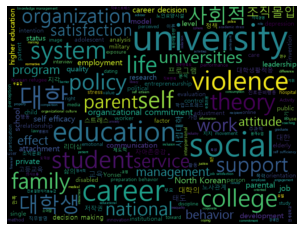

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

noun_text = ' '.join(list_ex_load)
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH)
wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('korean.png')